In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
import os
import seaborn as sns
import matplotlib.pyplot as plt
from FunctionsRevision import Functions as fun

In [2]:
jsonName = 'DataSetRevision'
workPath = './%s.json'

path = workPath %jsonName

In [3]:
dataSet = pd.io.json.read_json(path)
display(dataSet)
nCond = 12
nIter = 60
totalSamp = len(dataSet)
nSamp = int(totalSamp / (nCond * nIter))

,timeStamp,initTime,targetFPS,sampleNumber,averageInterFrameTime,averageFPS,maxFPS,minFPS,currentFPS,allocatedMemory,...,CPE_rsrq_dB,CPE_rsrp_dBm,CPE_rssi_dBm,CPE_sinr_dB,CPE_ulbandwidth_MHz,CPE_dlbandwidth_MHz,CPE_PPusch_dBm,CPE_PPucch_dBm,CPE_PSrs_dBm,CPE_PPrach_dBm
0,2022-04-21 09:39:35.000000000,394.558688,-1,72,13.64,73.334938,304.414001,3.018745,71.573959,25.450607,...,-7,-46,-51,25,5,5,-5,-5,-6,-5
1,2022-04-21 09:39:23.000000000,394.558688,-1,72,13.58,73.660591,253.938065,11.455984,71.670677,25.442200,...,-7,-46,-51,25,5,5,-5,-5,-6,-5
2,2022-04-21 09:39:24.000000000,394.558688,-1,72,13.41,74.556358,292.642731,11.455984,72.460213,25.445415,...,-7,-46,-51,25,5,5,-5,-5,-6,-5
3,2022-04-21 09:39:25.000000256,394.558688,-1,72,13.51,74.006729,297.199860,11.455984,70.552177,25.445444,...,-7,-46,-51,25,5,5,-5,-5,-6,-5
4,2022-04-21 09:39:26.000000000,394.558688,-1,72,13.44,74.377777,297.199860,11.455984,72.569489,25.442148,...,-7,-46,-51,25,5,5,-5,-5,-6,-5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86395,2022-04-25 16:39:51.000000000,7375.272493,-1,72,13.38,74.753975,311.738953,4.133979,99.376831,25.254660,...,-14,-72,-51,-3,20,20,2,2,2,-5
86396,2022-04-25 16:39:52.000000000,7375.272493,-1,72,13.44,74.387184,311.738953,4.133979,72.251617,25.254660,...,-14,-72,-51,-3,20,20,2,2,2,-5
86397,2022-04-25 16:39:53.000000000,7375.272493,-1,72,13.46,74.279602,311.738953,4.133979,71.266052,25.254660,...,-14,-72,-51,-3,20,20,2,2,2,-5
86398,2022-04-25 16:39:54.000000256,7375.272493,-1,72,13.48,74.180161,311.738953,4.133979,72.981049,25.254660,...,-14,-72,-51,-3,20,20,2,2,2,-5


In [4]:
varFeature = (dataSet.var(axis = 0, numeric_only = True) != 0.00)
noVar = varFeature[varFeature == True].index
display(noVar)
dataSet = dataSet[noVar]

Index(['initTime', 'averageInterFrameTime', 'averageFPS', 'maxFPS', 'minFPS',
       'currentFPS', 'allocatedMemory', 'videoLoadingTime', 'initPlayingTime',
       'mediaDuration', 'mediaFrames', 'maxSeekFrameNumber', 'videoWidth',
       'videoHeight', 'resolutionSwitches', 'videoDisplayRate', 'hasAudio',
       'estimatedTotalBandwidthUsed', 'stallCount', 'stallEvents', 'stallTime',
       'currentFrame', 'throughput', 'bufferDiff', 'bufferDuration',
       'bufferMin', 'bufferMax', 'rtt', 'ovAvgFps', 'ovAvgVideoFps',
       'avgStallTime', 'avgStallTimeFixed', 'UE_dl_tx', 'UE_ul_tx',
       'UE_pucch1_snr', 'UE_pusch_snr', 'UE_epre', 'UE_ul_phr',
       'UE_ul_path_loss', 'UE_dl_mcs', 'UE_ul_mcs', 'UE_turbo_decoder_avg',
       'UE_turbo_decoder_max', 'UE_cqi', 'UE_ri', 'UE_UE_dl_retx',
       'UE_UE_ul_retx', 'UE_UE_dl_bitrate', 'UE_UE_ul_bitrate', 'xGlobal',
       'dl_bitrate', 'ul_bitrate', 'dl_tx', 'ul_tx', 'dl_retx', 'ul_retx',
       'dl_use_avg', 'ul_use_min', 'ul_use_max', 

In [5]:
fun.MapResolution(dataSet, totalSamp, nSamp)

discarded = ['averageInterFrameTime', 'maxFPS', 'minFPS', 'averageFPS', 'currentFPS', 'allocatedMemory', 'mediaDuration', 'mediaFrames', 'maxSeekFrameNumber',
             'videoHeight', 'hasAudio', 'currentFrame', 'bufferDiff', 'bufferMin', 'bufferMax', 'ovAvgFps', 'ovAvgVideoFps', 'avgStallTime', 'initTime', 'videoLoadingTime']
dataSet.drop(discarded, axis = 1, inplace = True)
nVar = len(dataSet.columns)

In [6]:
dataSet

,initPlayingTime,videoWidth,resolutionSwitches,resolution,resProfile,videoDisplayRate,estimatedTotalBandwidthUsed,stallCount,stallEvents,stallTime,...,CPE_cqi1,CPE_rsrq_dB,CPE_rsrp_dBm,CPE_sinr_dB,CPE_ulbandwidth_MHz,CPE_dlbandwidth_MHz,CPE_PPusch_dBm,CPE_PPucch_dBm,CPE_PSrs_dBm,CPE_PPrach_dBm
0,0.34,3840,1,5,0,18.359852,15902756.0,0,0,0.0,...,14,-7,-46,25,5,5,-5,-5,-6,-5
1,0.34,3840,1,5,0,29.469547,19095772.0,0,0,0.0,...,14,-7,-46,25,5,5,-5,-5,-6,-5
2,0.34,3840,1,5,0,29.880476,18809394.0,0,0,0.0,...,14,-7,-46,25,5,5,-5,-5,-6,-5
3,0.34,3840,1,5,0,29.684599,18809394.0,0,0,0.0,...,14,-7,-46,25,5,5,-5,-5,-6,-5
4,0.34,3840,1,5,0,29.739775,18809394.0,0,0,0.0,...,14,-7,-46,25,5,5,-5,-5,-6,-5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86395,0.40,1440,1,3,0,30.360531,5480359.0,0,0,0.0,...,127,-14,-72,-3,20,20,2,2,2,-5
86396,0.40,1440,1,3,0,30.360531,5480359.0,0,0,0.0,...,127,-14,-72,-3,20,20,2,2,2,-5
86397,0.40,1440,1,3,0,29.739775,5480359.0,0,0,0.0,...,127,-14,-72,-3,20,20,2,2,2,-5
86398,0.40,1440,1,3,0,30.000000,5480359.0,0,0,0.0,...,127,-14,-72,-3,20,20,2,2,2,-5


In [7]:
mat1 = dataSet.corr('pearson')
mat2 = dataSet.corr('spearman')

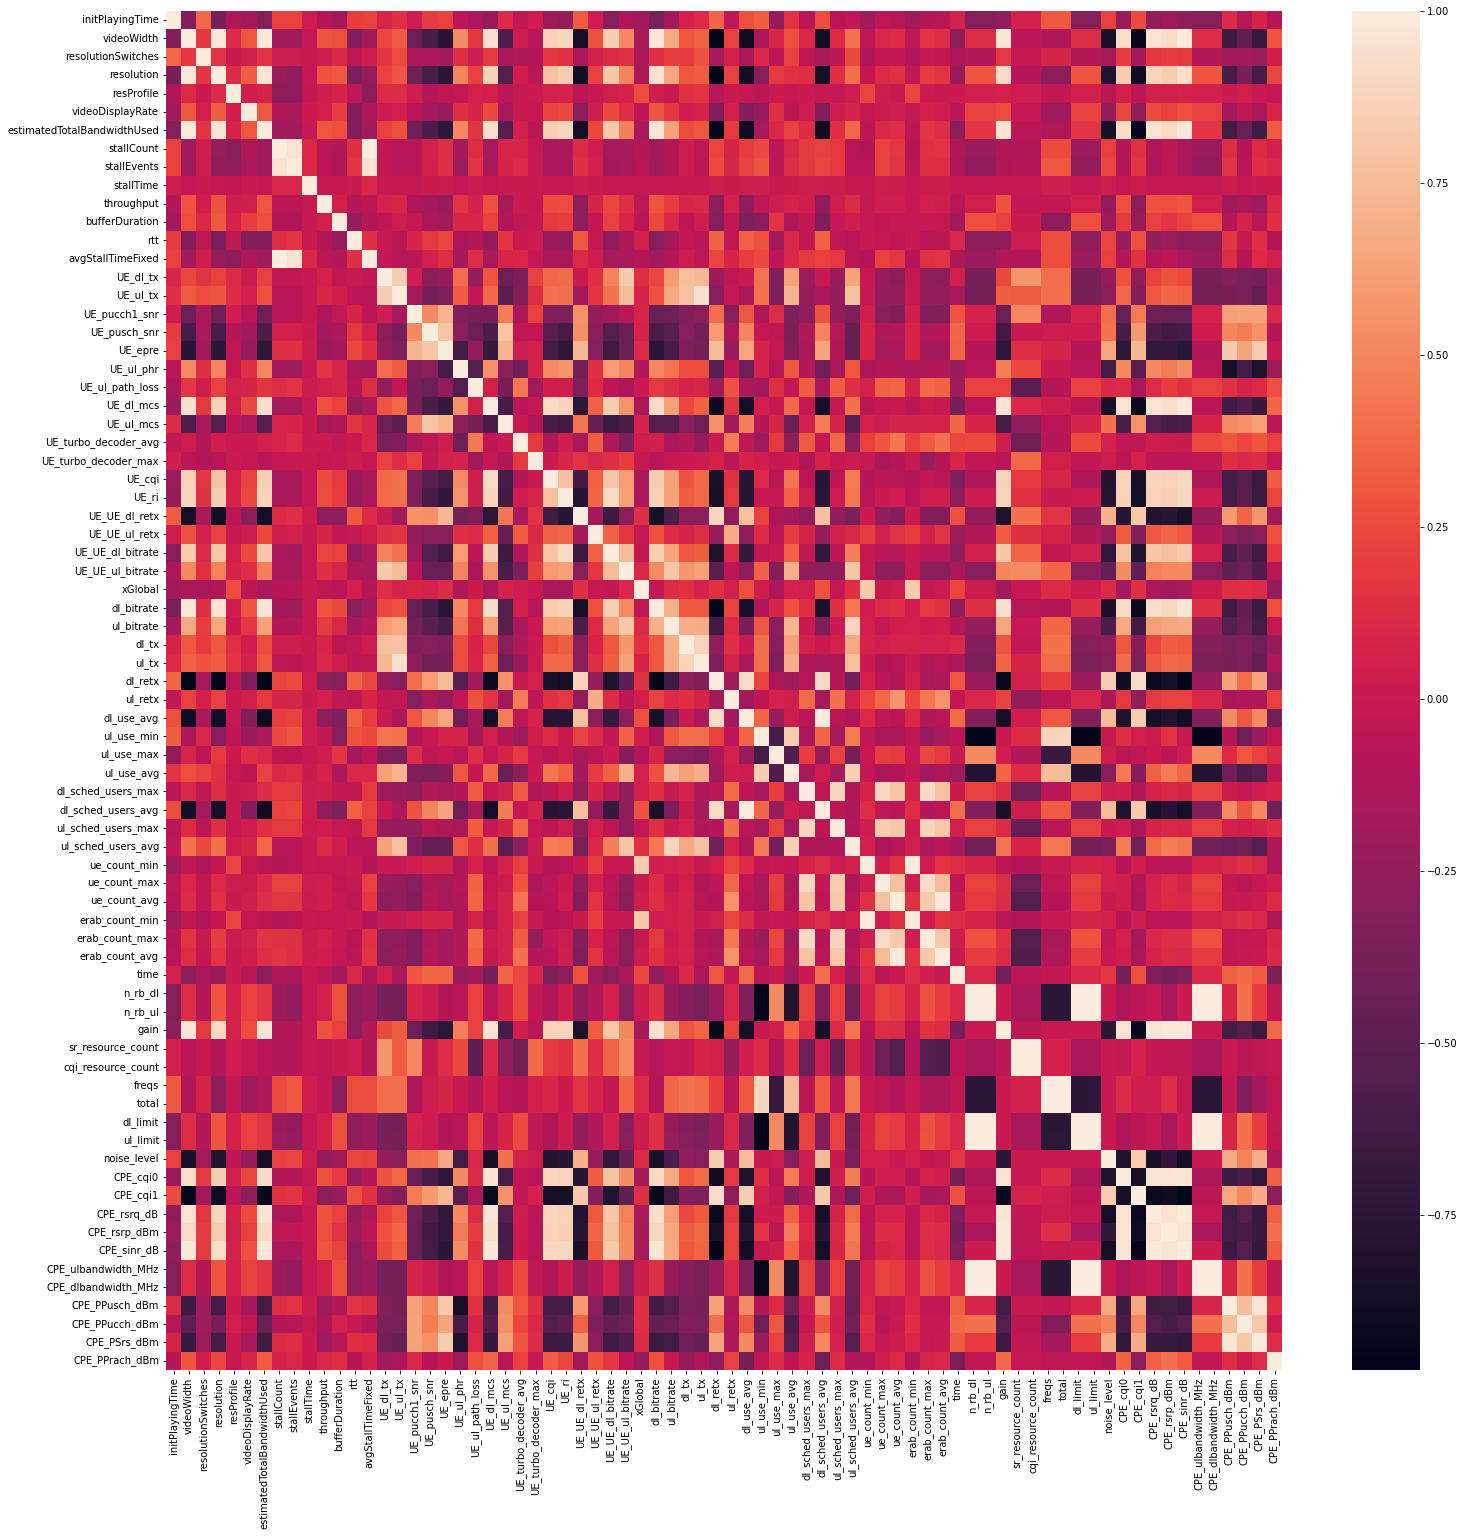

In [8]:
f1 = plt.figure(figsize=(25, 25))
ax = sns.heatmap(mat1, 
        xticklabels=mat1.columns,
        yticklabels=mat1.columns)

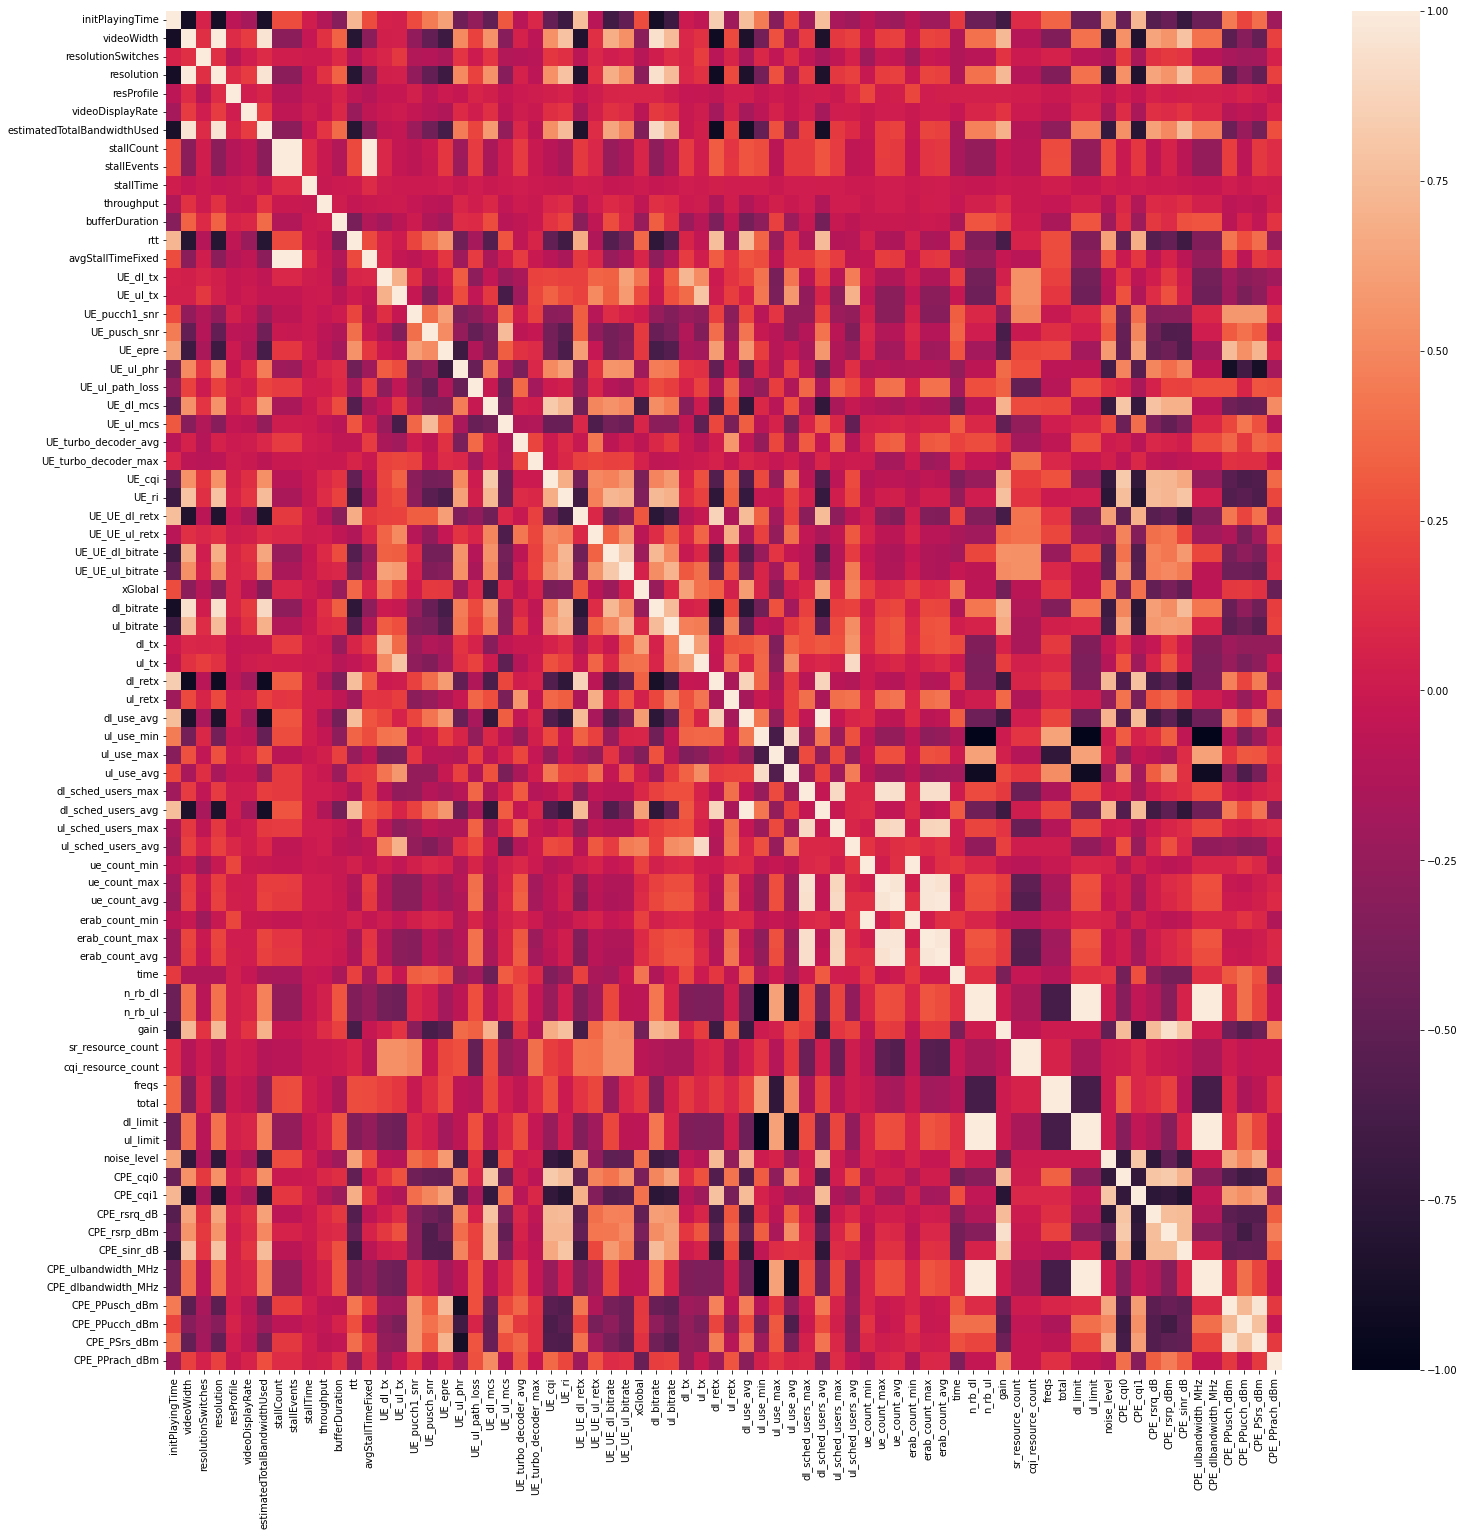

In [9]:
f2 = plt.figure(figsize=(25, 25))
ax2 = sns.heatmap(mat2, 
        xticklabels=mat2.columns,
        yticklabels=mat2.columns)

In [10]:
fun.GetCorrelatedVars(mat2, 'resolution', 0.5)

videoWidth                     1.000000
resolution                     1.000000
estimatedTotalBandwidthUsed    0.954483
dl_bitrate                     0.939545
dl_retx                        0.925718
initPlayingTime                0.886248
dl_use_avg                     0.850695
dl_sched_users_avg             0.846842
CPE_cqi1                       0.825796
UE_UE_dl_retx                  0.822422
rtt                            0.791159
CPE_sinr_dB                    0.788528
UE_ri                          0.786724
ul_bitrate                     0.755275
noise_level                    0.737010
gain                           0.736905
UE_epre                        0.685353
UE_UE_dl_bitrate               0.681922
CPE_rsrq_dB                    0.640161
CPE_rsrp_dBm                   0.559611
UE_dl_mcs                      0.553355
CPE_cqi0                       0.545968
UE_cqi                         0.540665
UE_UE_ul_bitrate               0.535040
CPE_PPusch_dBm                 0.520173


In [11]:
fun.GetCorrelatedVars(mat2, 'videoDisplayRate', 0.1)

videoDisplayRate               1.000000
rtt                            0.228275
videoWidth                     0.183745
resolution                     0.183745
dl_retx                        0.182806
estimatedTotalBandwidthUsed    0.182323
dl_sched_users_avg             0.177315
dl_use_avg                     0.176764
dl_bitrate                     0.175321
initPlayingTime                0.173608
CPE_cqi1                       0.159566
UE_ri                          0.154477
UE_UE_dl_retx                  0.153354
noise_level                    0.148507
CPE_sinr_dB                    0.145854
gain                           0.141221
UE_UE_dl_bitrate               0.134864
ul_bitrate                     0.133568
UE_dl_mcs                      0.130752
CPE_rsrq_dB                    0.129178
UE_epre                        0.125043
UE_cqi                         0.119165
CPE_cqi0                       0.115577
CPE_rsrp_dBm                   0.106512
UE_UE_ul_bitrate               0.105389


In [12]:
corrKQI = mat1.iloc[0:16, 0:16]
display(corrKQI)

,initPlayingTime,videoWidth,resolutionSwitches,resolution,resProfile,videoDisplayRate,estimatedTotalBandwidthUsed,stallCount,stallEvents,stallTime,throughput,bufferDuration,rtt,avgStallTimeFixed,UE_dl_tx,UE_ul_tx
initPlayingTime,1.000000,-0.319297,0.369315,-0.369528,-0.115580,-0.170548,-0.310279,0.209219,0.221731,0.022424,-0.093822,-0.173438,0.197254,0.209242,0.083114,0.136786
videoWidth,-0.319297,1.000000,0.171610,0.972587,0.107325,0.302657,0.983955,-0.184323,-0.201447,-0.020443,0.297120,0.268560,-0.313307,-0.184622,0.243561,0.317931
resolutionSwitches,0.369315,0.171610,1.000000,0.165261,0.007671,0.043984,0.163776,0.032219,0.024293,0.003191,0.042371,0.104306,-0.046846,0.031995,0.152470,0.265523
resolution,-0.369528,0.972587,0.165261,1.000000,0.113317,0.335997,0.958484,-0.234117,-0.261667,-0.026206,0.289746,0.309939,-0.363391,-0.234610,0.223709,0.293500
resProfile,-0.115580,0.107325,0.007671,0.113317,1.000000,0.041636,0.071034,-0.279134,-0.259122,-0.029319,0.022568,0.072733,-0.035455,-0.278451,0.108417,0.115361
videoDisplayRate,-0.170548,0.302657,0.043984,0.335997,0.041636,1.000000,0.303234,-0.124294,-0.136608,0.006781,0.048607,0.201538,-0.319471,-0.124547,0.018424,0.054094
estimatedTotalBandwidthUsed,-0.310279,0.983955,0.163776,0.958484,0.071034,0.303234,1.000000,-0.180828,-0.197266,-0.020077,0.300785,0.268722,-0.314735,-0.181104,0.207958,0.280992
stallCount,0.209219,-0.184323,0.032219,-0.234117,-0.279134,-0.124294,-0.180828,1.000000,0.951415,0.103550,-0.049950,-0.107171,0.137268,0.999991,-0.039971,-0.075473
stallEvents,0.221731,-0.201447,0.024293,-0.261667,-0.259122,-0.136608,-0.197266,0.951415,1.000000,0.098189,-0.054208,-0.125763,0.159528,0.952116,-0.034936,-0.076434
stallTime,0.022424,-0.020443,0.003191,-0.026206,-0.029319,0.006781,-0.020077,0.103550,0.098189,1.000000,-0.007759,-0.004019,-0.002119,0.103571,-0.004287,-0.008219


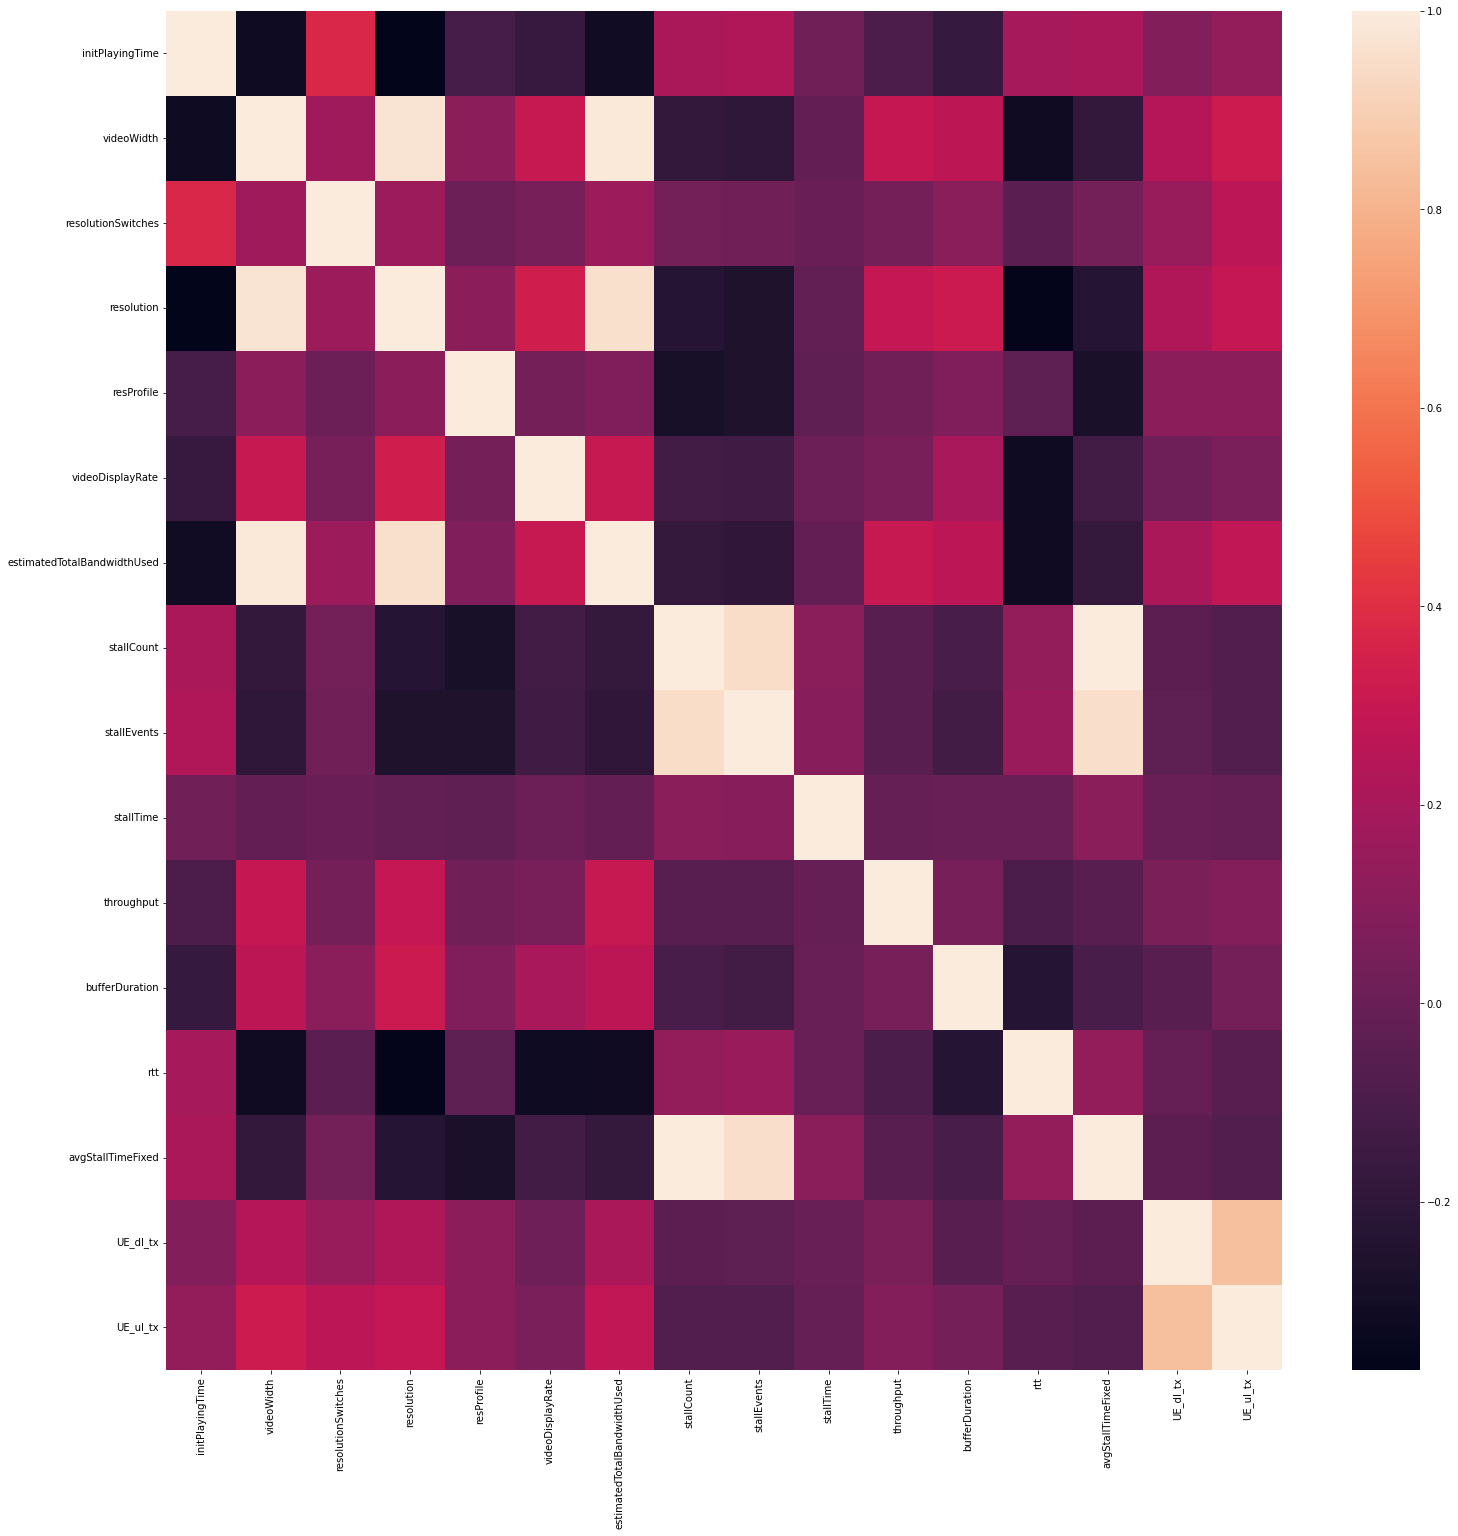

In [13]:
f3 = plt.figure(figsize=(25, 25))
ax3 = sns.heatmap(corrKQI, 
        xticklabels=corrKQI.columns,
        yticklabels=corrKQI.columns)

In [14]:
# ESTIMATE AVERAGE VALUES PER SESSION

headers = dataSet.columns
auxFrame = []
aux = []

for i in range(0, totalSamp, nSamp):
    
    
    for j in headers:
        varPos = headers.get_loc(j)
        values = dataSet.iloc[i:i + nSamp, varPos]
        if(j == 'videoLoadingTime' or j == 'initPlayingTime' or j == 'resolutionSwitches' or j == 'stallEvents' or j == 'avgStallTimeFixed' or j == 'stallCount'):
            aux.append(values.iloc[-1])
        elif(j == 'videoWidth' or j == 'resolution' or j == 'resProfile'):
            aux.append(values.median())
        else:
            aux.append(values.mean())
        
listSize = len(aux)
dataAux = np.reshape(aux,(int(listSize/nVar), nVar))
dataSetProm = pd.DataFrame(data = dataAux, columns = headers)

In [15]:
# CALCULATE THE RESOLUTION PERCENTAGE PER SESSION
aux = []
param = 'resolution'
resIndex = dataSet.resolution.unique()

for i in range(0, totalSamp, nSamp):
    #Count the number of occurrences for each resolution in every session
    aux.append(((dataSet.iloc[i: i + nSamp, headers.get_loc(param)].value_counts().reindex(index = resIndex, fill_value = 0) / 120) * 100).tolist())

#Name the columns    
resIndexCol = ['res' + str(i) for i in resIndex]
#Generate a new dataframe containing the resolution counts
res = pd.DataFrame(np.concatenate(aux).reshape(int(totalSamp/nSamp), len(resIndex)), columns = resIndexCol)

#Concatenete both dataframes into dataSetProm
dataSetProm = pd.concat([dataSetProm.iloc[:,0:headers.get_loc('resolution')], res, dataSetProm.iloc[:,headers.get_loc('resolution'):]], axis = 1)

In [42]:
'''import math
math.exp(-35 * (9e6/(3840 * (3840/2))))'''

2.785722852836511e-19

In [46]:
'''# CALCULATE THE MOS BASED ON KROGFOSS PAPER https://ieeexplore.ieee.org/stamp/stamp.jsp?arnumber=9123090

Qc = []
# Constants for QoE model
videoWidth = dataSet.videoWidth
aspectRatio = 2/1
    # Constant for model of codec (a0 = 94 static, 35 motion)
a0 = 35

# Map resolution to its original encoding bitrate (Extracted from video manifest)

for i in range(0, totalSamp):
    if videoWidth.iloc[i] == 3840:
        bitrate = 9e6
    elif videoWidth.iloc[i] == 2160:
        bitrate = 5e6
    elif videoWidth.iloc[i] == 1440:
        bitrate = 3e6
    elif videoWidth.iloc[i] == 1080:
        bitrate = 1.5e6
    elif videoWidth.iloc[i] == 720:
        bitrate = 1e6
    else:
        bitrate = 0
        
    # Find the number of pixels per frame
    pixels = videoWidth.iloc[i] * (videoWidth.iloc[i] / 2)

    # Calculate CODEC Quality from impairment
    Ic = math.exp(-a0 * (bitrate / pixels))
    Qc.append(1 - Ic)
    '''
    

/tmp/ipykernel_1731584/507057850.py:30: RuntimeWarning: invalid value encountered in double_scalars
  Ic = math.exp(-a0 * (bitrate / pixels))


In [17]:
mat3 = dataSetProm.corr('pearson')
mat4 = dataSetProm.corr('spearman')

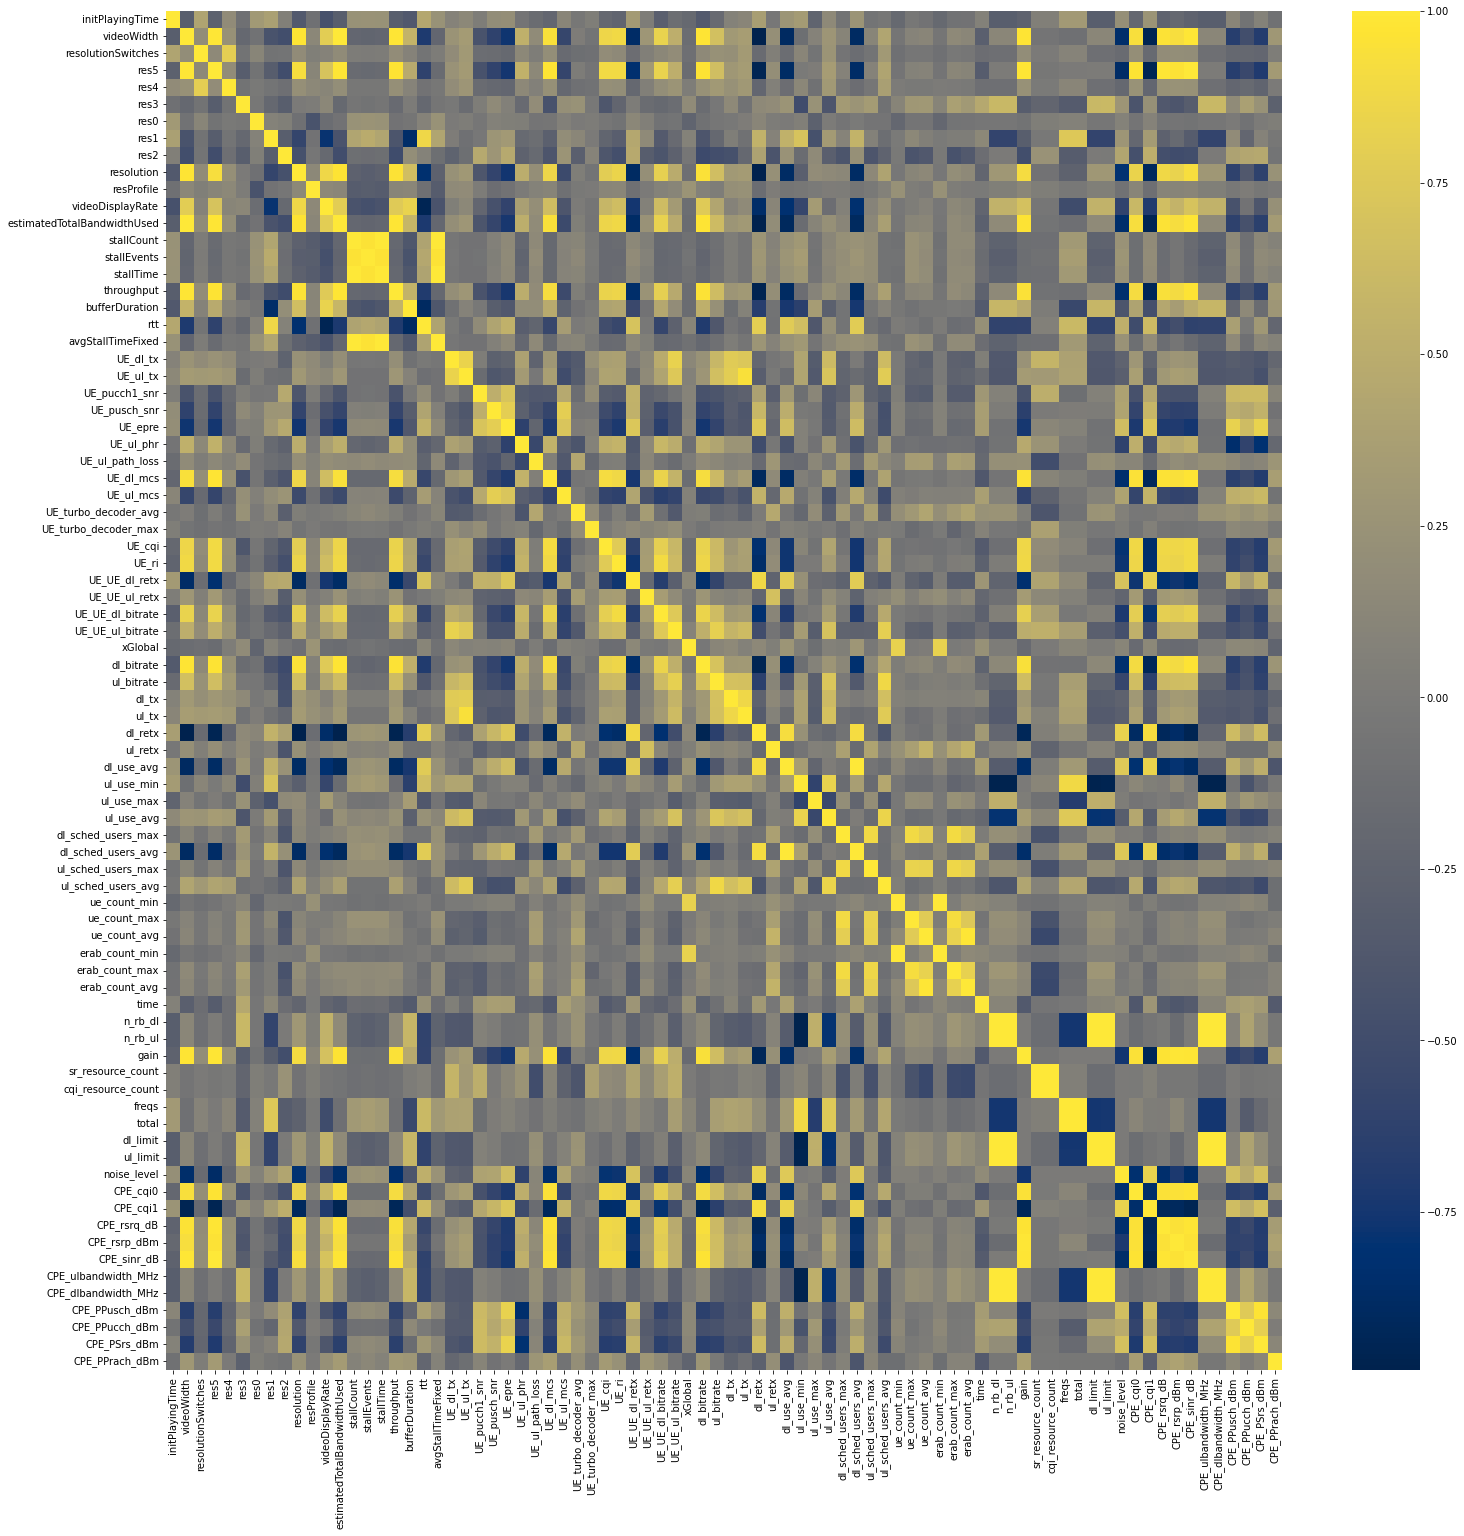

In [18]:
f4 = plt.figure(figsize=(25, 25))
ax4 = sns.heatmap(mat3, 
        xticklabels=mat3.columns,
        yticklabels=mat3.columns, cmap = 'cividis')

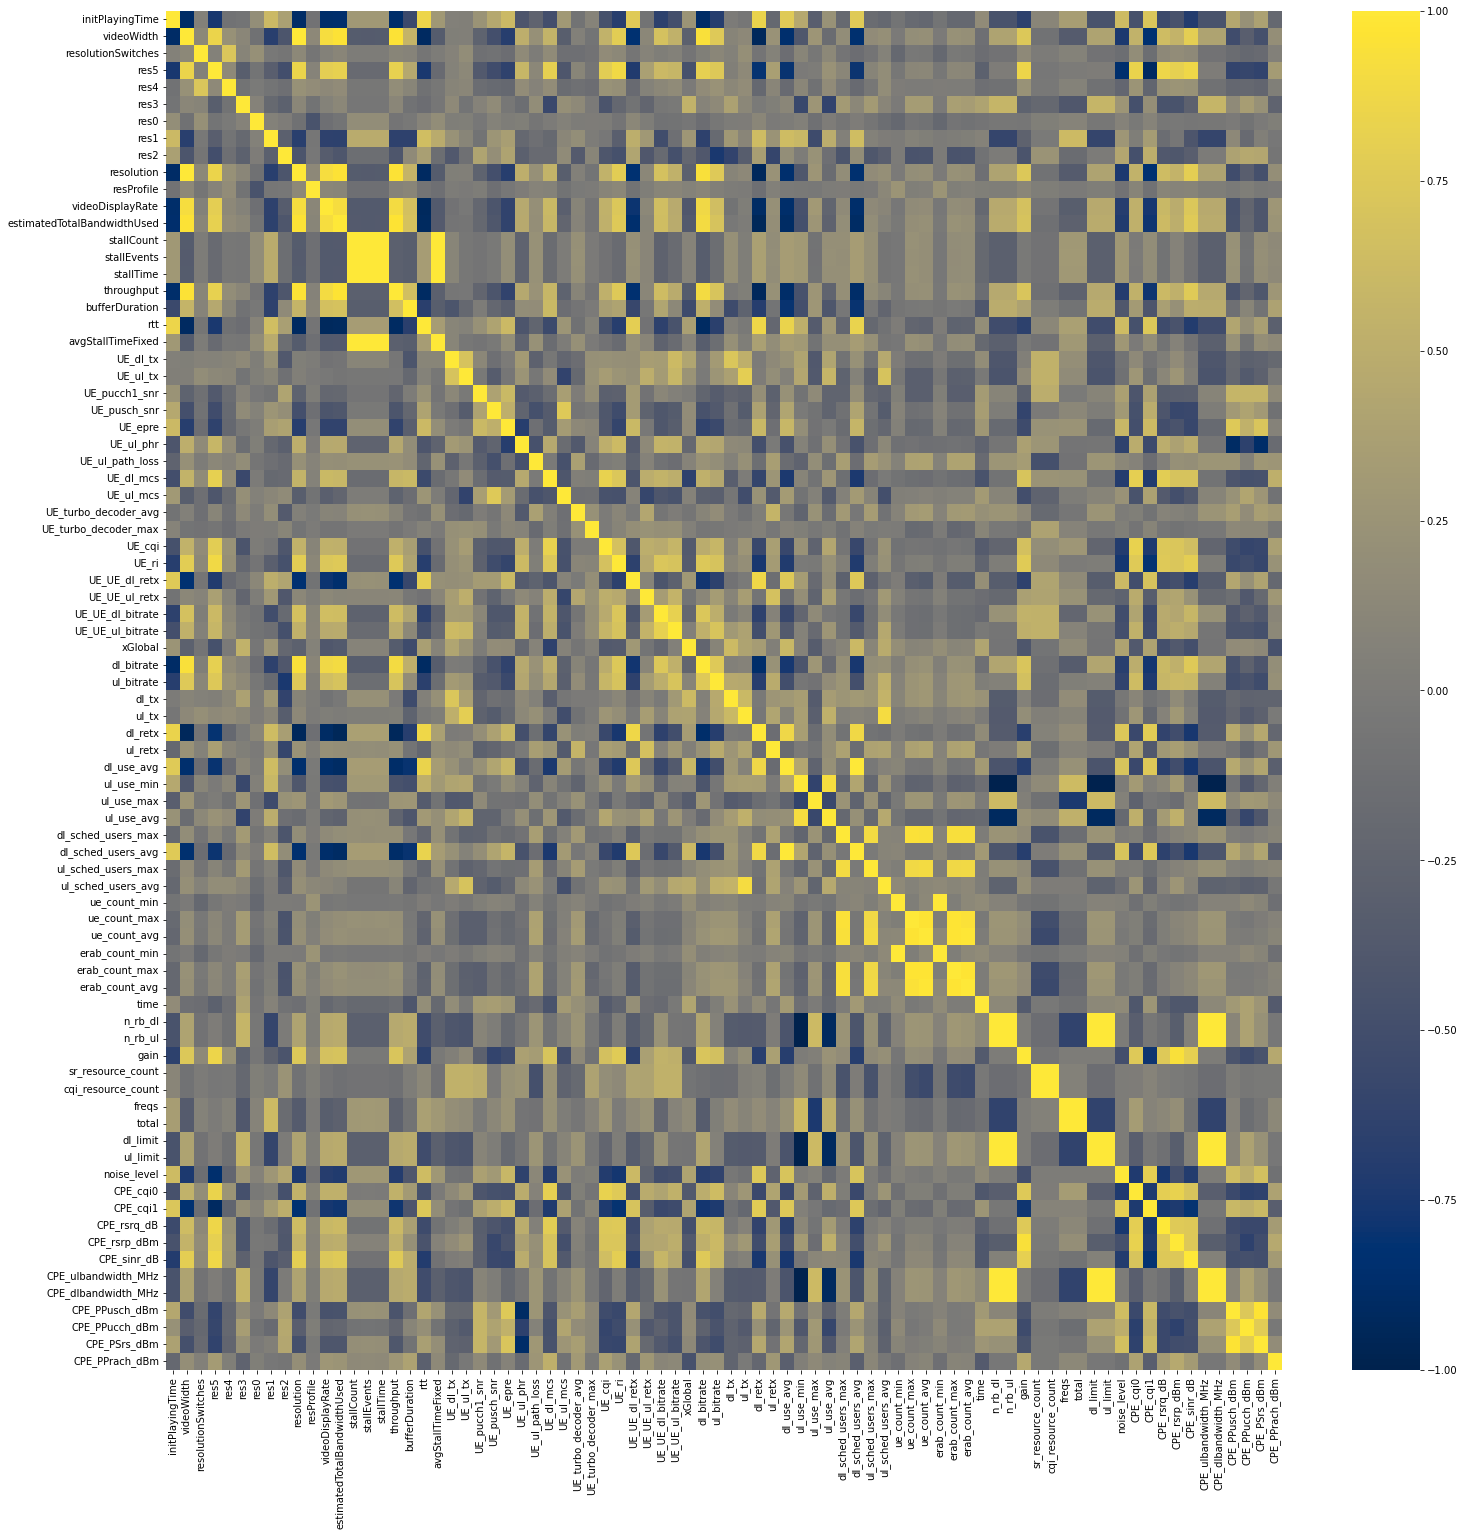

In [19]:
f5 = plt.figure(figsize=(25, 25))
ax5 = sns.heatmap(mat4, 
        xticklabels=mat4.columns,
        yticklabels=mat4.columns, cmap = 'cividis')

In [20]:
threshold = 0.75

In [21]:
corrKQI1 = mat3.iloc[0:20, 0:20]

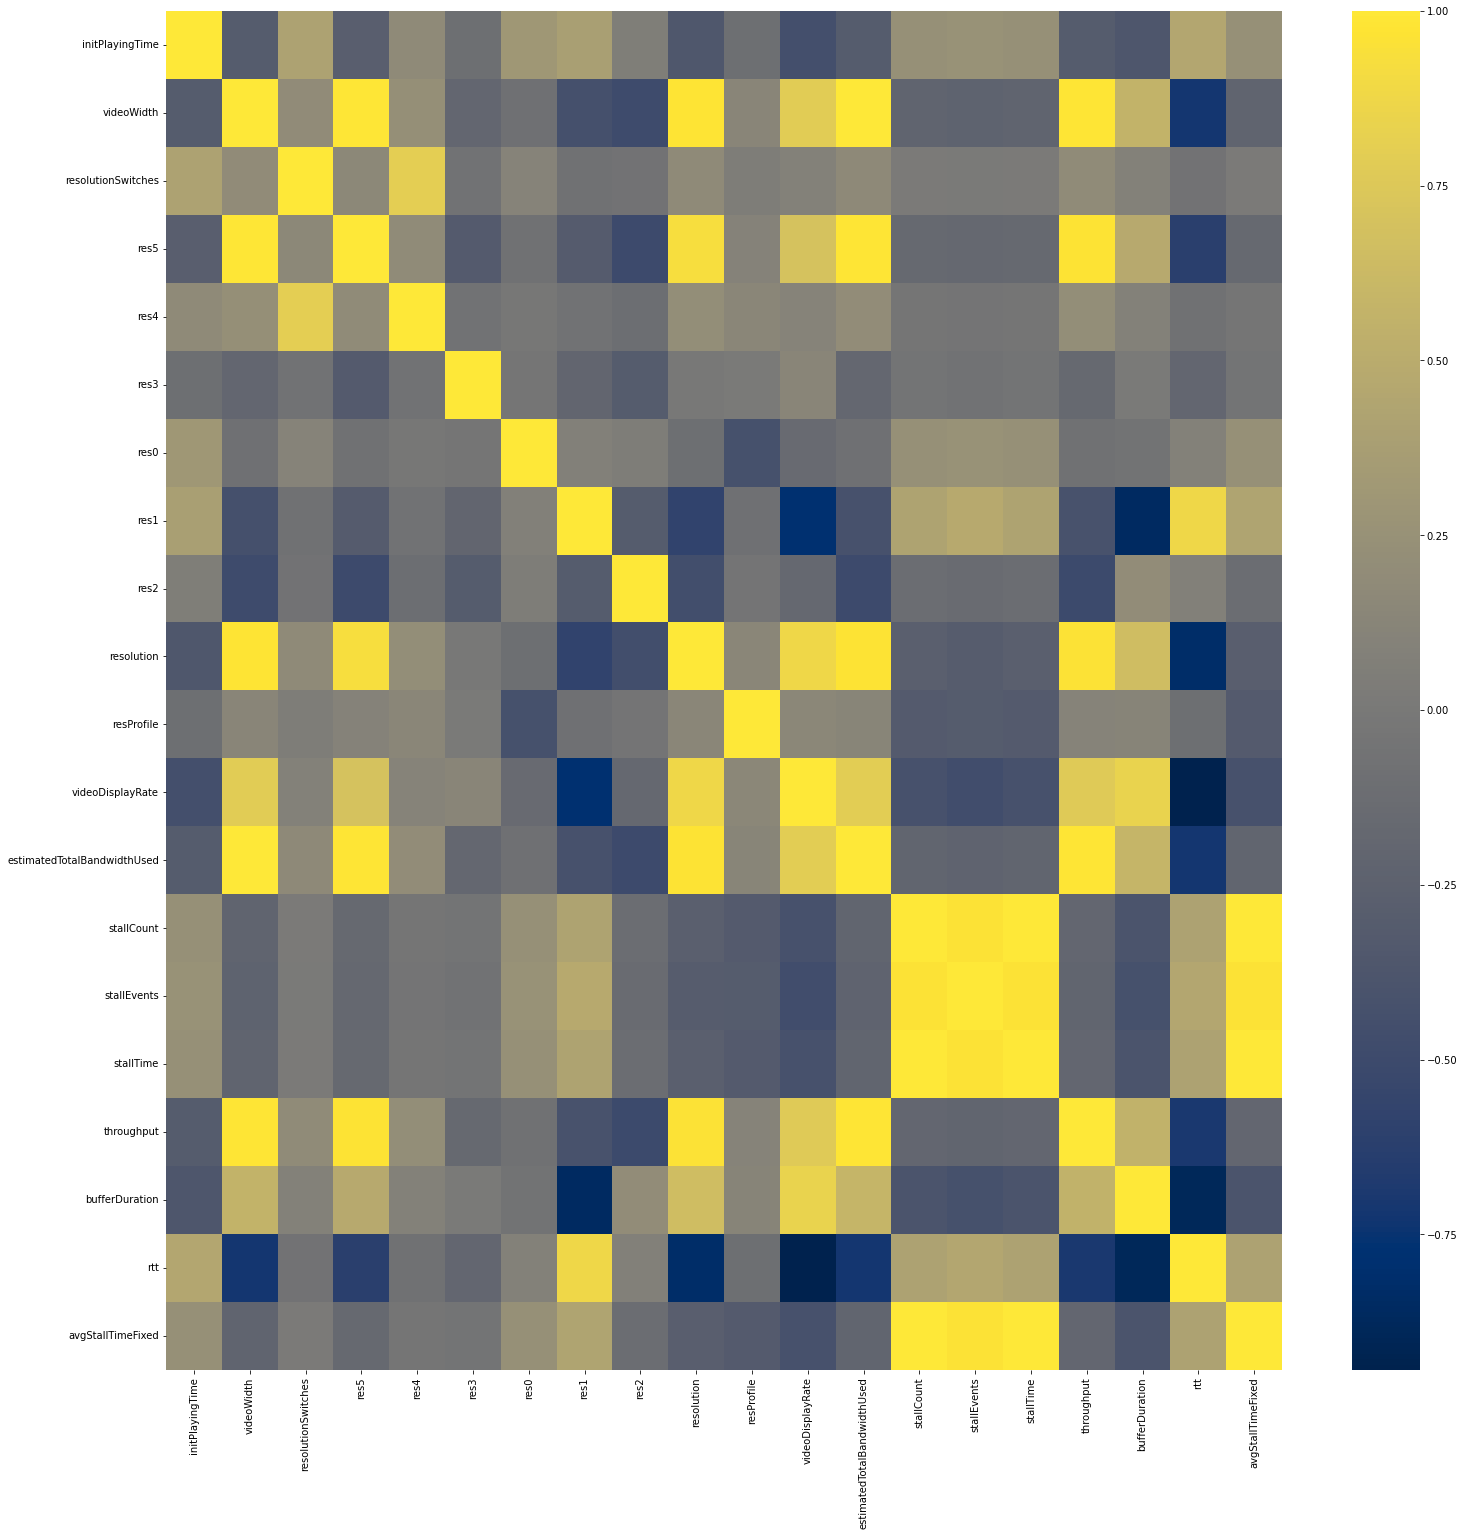

In [22]:
f6 = plt.figure(figsize=(25, 25))
ax6 = sns.heatmap(corrKQI1, 
        xticklabels=corrKQI1.columns,
        yticklabels=corrKQI1.columns, cmap = 'cividis')

In [23]:
fun.GetCorrelatedVars(corrKQI1, 'resolution', threshold)

resolution                     1.000000
videoWidth                     0.973714
estimatedTotalBandwidthUsed    0.966154
throughput                     0.955512
res5                           0.924197
videoDisplayRate               0.872287
rtt                            0.829837
Name: resolution, dtype: float64

In [24]:
fun.GetCorrelatedVars(corrKQI1, 'videoDisplayRate', threshold)

videoDisplayRate               1.000000
rtt                            0.943962
resolution                     0.872287
bufferDuration                 0.834627
estimatedTotalBandwidthUsed    0.788374
res1                           0.785294
videoWidth                     0.784637
throughput                     0.765993
Name: videoDisplayRate, dtype: float64

In [25]:
fun.GetCorrelatedVars(corrKQI1, 'initPlayingTime', threshold)

initPlayingTime    1.0
Name: initPlayingTime, dtype: float64

In [26]:
fun.GetCorrelatedVars(corrKQI1, 'avgStallTimeFixed', threshold)

avgStallTimeFixed    1.000000
stallCount           0.999991
stallTime            0.999991
stallEvents          0.957840
Name: avgStallTimeFixed, dtype: float64

In [27]:
fun.GetCorrelatedVars(corrKQI1, 'rtt', threshold)

rtt                 1.000000
videoDisplayRate    0.943962
bufferDuration      0.887541
res1                0.873077
resolution          0.829837
Name: rtt, dtype: float64

In [28]:
fun.GetCorrelatedVars(corrKQI1, 'bufferDuration', threshold)

bufferDuration      1.000000
rtt                 0.887541
res1                0.859820
videoDisplayRate    0.834627
Name: bufferDuration, dtype: float64

In [29]:
fun.GetCorrelatedVars(corrKQI1, 'throughput', threshold)

throughput                     1.000000
estimatedTotalBandwidthUsed    0.981986
videoWidth                     0.979957
res5                           0.966252
resolution                     0.955512
videoDisplayRate               0.765993
Name: throughput, dtype: float64

In [30]:
fun.GetCorrelatedVars(corrKQI1, 'res5', threshold)

res5                           1.000000
videoWidth                     0.986081
estimatedTotalBandwidthUsed    0.980947
throughput                     0.966252
resolution                     0.924197
Name: res5, dtype: float64

In [31]:
corrKQI1.abs().mean(axis = 0).sort_values(ascending = False)

videoDisplayRate               0.523462
resolution                     0.518160
rtt                            0.501424
videoWidth                     0.497421
estimatedTotalBandwidthUsed    0.493845
throughput                     0.484695
res5                           0.463577
bufferDuration                 0.447561
res1                           0.432867
stallEvents                    0.397260
avgStallTimeFixed              0.385267
stallTime                      0.384917
stallCount                     0.384917
initPlayingTime                0.317352
res2                           0.269819
resProfile                     0.206673
res4                           0.193778
resolutionSwitches             0.187087
res0                           0.186540
res3                           0.163710
dtype: float64

In [32]:
corrKQI1.product(axis = 0).abs().sort_values(ascending = False)

videoDisplayRate               1.352986e-08
videoWidth                     4.632879e-09
estimatedTotalBandwidthUsed    2.949228e-09
throughput                     1.601515e-09
rtt                            1.502591e-09
resolution                     7.055974e-10
res5                           4.941464e-10
res1                           2.863167e-10
bufferDuration                 2.618581e-11
initPlayingTime                3.885766e-12
stallEvents                    1.568924e-12
avgStallTimeFixed              7.861771e-13
stallTime                      7.666446e-13
stallCount                     7.666446e-13
res2                           2.157120e-15
resProfile                     6.641538e-18
res0                           5.144602e-19
res4                           1.670902e-19
resolutionSwitches             1.174540e-21
res3                           3.663134e-22
dtype: float64

In [33]:
#dataSetProm.to_json(r'./datasetProm.json')